# Test if eVariants at splice site are more likely to colocalize with GWAS

In [1]:
setwd("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls")

source("script/packages.R"  )
source("script/input_data.R")
source("script/functions.R" )
source("script/colors.R"    )

suppressPackageStartupMessages(library(coloc))

In [3]:
geneinfo = fread("pipeline/1.2.expression/isoform_info.txt"                   , sep = "\t", header = TRUE , data.table = FALSE)
coloc    = fread("pipeline/6.1.coloc_gwas/coloc.eqtls.isoform.txt"            , sep = "\t", header = TRUE , data.table = FALSE)
fm       = fread("pipeline/3.2.eqtls/eqtls_fine_map/cardiac_eqtls.isoform.txt", sep = "\t", header = TRUE , data.table = FALSE)


In [11]:
intron_01 = fread("/frazer01/home/tarthur/projects/CARDIPS/rbp_analysis/distance_analysis/tables/pp01.fisher.in", sep = "\t", header = TRUE , data.table = FALSE)
intron_10 = fread("/frazer01/home/tarthur/projects/CARDIPS/rbp_analysis/distance_analysis/tables/pp10.fisher.in", sep = "\t", header = TRUE , data.table = FALSE)
intron_50 = fread("/frazer01/home/tarthur/projects/CARDIPS/rbp_analysis/distance_analysis/tables/pp50.fisher.in", sep = "\t", header = TRUE , data.table = FALSE)

intron_01$id            = intron_01$V7
intron_10$id            = intron_10$V7
intron_50$id            = intron_50$V7
intron_01$transcript_id = intron_01$V9
intron_10$transcript_id = intron_10$V9
intron_50$transcript_id = intron_50$V9
intron_01$tr2var        = paste(intron_01$transcript_id, intron_01$id)
intron_10$tr2var        = paste(intron_10$transcript_id, intron_10$id)
intron_50$tr2var        = paste(intron_50$transcript_id, intron_50$id)
fm       $tr2var        = paste(fm       $transcript_id, fm       $id)


In [76]:
str(intron_01)

'data.frame':	16376 obs. of  19 variables:
 $ gene_id            : chr  "ENSG00000000971.16_4" "ENSG00000000971.16_4" "ENSG00000000971.16_4" "ENSG00000000971.16_4" ...
 $ V1                 : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ V2                 : int  196659369 196659369 196683047 196684899 196684899 196684899 196697652 196697652 196697652 196706790 ...
 $ V3                 : int  196682865 196682865 196684723 196694251 196694251 196694251 196705954 196705954 196705954 196709749 ...
 $ V4                 : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ V5                 : int  196677898 196679010 196683274 196687515 196691625 196692148 196698082 196700322 196705520 196708455 ...
 $ V6                 : int  196677899 196679011 196683275 196687516 196691626 196692149 196698083 196700323 196705521 196708456 ...
 $ V7                 : chr  "VAR_1_196677898_A_T" "VAR_1_196679010_A_G" "VAR_1_196683274_A_G" "VAR_1_196687515_G_A" ...
 $ V9                 : chr  "ENST00000367429.9_2" "ENST0

In [75]:
head(intron_01)

,gene_id,V1,V2,V3,V4,V5,V6,V7,V9,strand,dist,intron_length,intron_length_adj50,intron_length_adj25,intron_id,key,id,transcript_id,tr2var
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ENSG00000000971.16_4,chr1,196659369,196682865,chr1,196677898,196677899,VAR_1_196677898_A_T,ENST00000367429.9_2,+,-4967,23496,23446,23471,chr1.196659369.196682865,ENSG00000000971.16_4.ENST00000367429.9_2.VAR_1_196677898_A_T,VAR_1_196677898_A_T,ENST00000367429.9_2,ENST00000367429.9_2 VAR_1_196677898_A_T
2,ENSG00000000971.16_4,chr1,196659369,196682865,chr1,196679010,196679011,VAR_1_196679010_A_G,ENST00000367429.9_2,+,-3855,23496,23446,23471,chr1.196659369.196682865,ENSG00000000971.16_4.ENST00000367429.9_2.VAR_1_196679010_A_G,VAR_1_196679010_A_G,ENST00000367429.9_2,ENST00000367429.9_2 VAR_1_196679010_A_G
3,ENSG00000000971.16_4,chr1,196683047,196684723,chr1,196683274,196683275,VAR_1_196683274_A_G,ENST00000367429.9_2,+,-1449,1676,1626,1651,chr1.196683047.196684723,ENSG00000000971.16_4.ENST00000367429.9_2.VAR_1_196683274_A_G,VAR_1_196683274_A_G,ENST00000367429.9_2,ENST00000367429.9_2 VAR_1_196683274_A_G
4,ENSG00000000971.16_4,chr1,196684899,196694251,chr1,196687515,196687516,VAR_1_196687515_G_A,ENST00000367429.9_2,+,-6736,9352,9302,9327,chr1.196684899.196694251,ENSG00000000971.16_4.ENST00000367429.9_2.VAR_1_196687515_G_A,VAR_1_196687515_G_A,ENST00000367429.9_2,ENST00000367429.9_2 VAR_1_196687515_G_A
5,ENSG00000000971.16_4,chr1,196684899,196694251,chr1,196691625,196691626,VAR_1_196691625_C_A,ENST00000367429.9_2,+,-2626,9352,9302,9327,chr1.196684899.196694251,ENSG00000000971.16_4.ENST00000367429.9_2.VAR_1_196691625_C_A,VAR_1_196691625_C_A,ENST00000367429.9_2,ENST00000367429.9_2 VAR_1_196691625_C_A
6,ENSG00000000971.16_4,chr1,196684899,196694251,chr1,196692148,196692149,VAR_1_196692148_C_T,ENST00000367429.9_2,+,-2103,9352,9302,9327,chr1.196684899.196694251,ENSG00000000971.16_4.ENST00000367429.9_2.VAR_1_196692148_C_T,VAR_1_196692148_C_T,ENST00000367429.9_2,ENST00000367429.9_2 VAR_1_196692148_C_T


In [23]:
intron2bin_01 = fread("/frazer01/home/tarthur/projects/CARDIPS/rbp_analysis/distance_analysis/tables/pp01.fisher.out", sep = "\t", header = TRUE , data.table = FALSE)


# Find sequence of the first 50 bp of each intron

In [92]:
mywd = "pipeline/3.2.eqtls/TMP.rbp_motifs"
dir.create(mywd, showWarnings = FALSE)

In [127]:
introns                = unique(intron_01[,c("V1", "V2", "V3", "transcript_id", "strand", "intron_length")])
colnames(introns)[1:3] = c("chrom", "from", "to")

introns$start = introns$to - 50
introns$end   = introns$to

introns[introns$strand == "-", "start"] = introns[introns$strand == "-", "from"]
introns[introns$strand == "-", "end"  ] = introns[introns$strand == "-", "from"] + 50

introns$score = 0

introns2bed = introns[order(introns$chrom, introns$start, introns$end), c("chrom", "start", "end", "transcript_id", "score", "strand")]
bed         = paste(mywd, "introns.bed", sep = "/")

fwrite(introns2bed, bed, sep = "\t", col.names = FALSE, row.names = FALSE)



In [100]:
fasta   = paste(mywd, "introns.txt", sep = "/")
command = paste("bedtools", "getfasta", "-s", "-tab", "-fi", "/frazer01/reference/public/hg19/hg19.fa", "-bed", bed, ">", fasta)

system(command)

message(command)

bedtools getfasta -s -tab -fi /frazer01/reference/public/hg19/hg19.fa -bed pipeline/3.2.eqtls/TMP.rbp_motifs/introns.bed > pipeline/3.2.eqtls/TMP.rbp_motifs/introns.txt



In [143]:
intron50_01 = as.data.frame(rbindlist(lapply(1:50, function(x)
{
    out = data.frame(pos       = x,
                     n_introns = nrow(introns[introns$intron_length >= x,]),
                     n_vars    = nrow(intron_01[intron_01$dist == -x,])
                    )
    out$fr_vars = out$n_vars / out$n_introns
    
    return(out)
})), stringsAsFactors = FALSE)

intron50_10 = as.data.frame(rbindlist(lapply(1:50, function(x)
{
    out = data.frame(pos       = x,
                     n_introns = nrow(introns[introns$intron_length >= x,]),
                     n_vars    = nrow(intron_10[intron_10$dist == -x,])
                    )
    out$fr_vars = out$n_vars / out$n_introns
    
    return(out)
})), stringsAsFactors = FALSE)

intron50_50 = as.data.frame(rbindlist(lapply(1:50, function(x)
{
    out = data.frame(pos       = x,
                     n_introns = nrow(introns[introns$intron_length >= x,]),
                     n_vars    = nrow(intron_50[intron_50$dist == -x,])
                    )
    out$fr_vars = out$n_vars / out$n_introns
    
    return(out)
})), stringsAsFactors = FALSE)



In [140]:
inseq           = fread(fasta, sep = "\t", header = FALSE, data.table = FALSE)
colnames(inseq) = c("region", "seq")

inseq = as.data.frame(rbindlist(lapply(inseq$seq, function(x)
{
    out = as.data.frame(t(as.matrix(unlist(strsplit(x, "")))))
    
    return(out)
})), stringsAsFactors = FALSE)

seq50 = as.data.frame(rbindlist(lapply(1:ncol(inseq), function(ii)
{
    out = data.frame(A = nrow(inseq[inseq[,ii] == "A", ]),
                     C = nrow(inseq[inseq[,ii] == "C", ]),
                     G = nrow(inseq[inseq[,ii] == "G", ]),
                     T = nrow(inseq[inseq[,ii] == "T", ])
                    )
    out[1,] = out[1,] / rowSums(out)
    
    return(out)
})), stringsAsFactors = FALSE)

#myseq

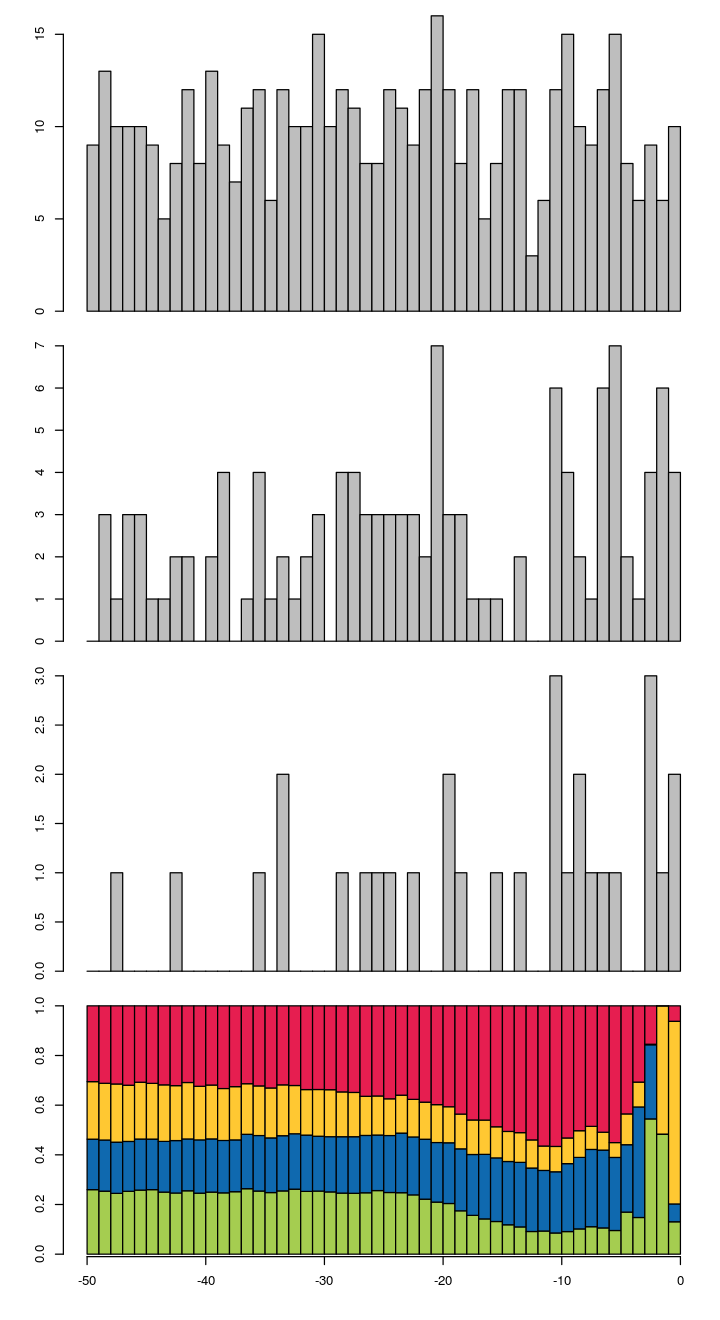

In [146]:
base2col = data.frame(base = c("A", "C", "G", "T"), color = c("#a5cd50", "#0f69af", "#ffc832", "#e61e50"))

options(repr.plot.width = 6, repr.plot.height = 11)

layout(cbind(1:4))

par(mar = c(1,4,1,1))
barplot(rev(intron50_01$n_vars), width = 1, space = 0)

par(mar = c(1,4,1,1))
barplot(rev(intron50_10$n_vars), width = 1, space = 0)

par(mar = c(1,4,1,1))
barplot(rev(intron50_50$n_vars), width = 1, space = 0)


par(mar = c(4,4,1,1))
barplot(t(as.matrix(seq50)), col = base2col$color, width = 1, space = 0)
axis(1, at = (0:5) * 10, labels = -(5:0) * 10)

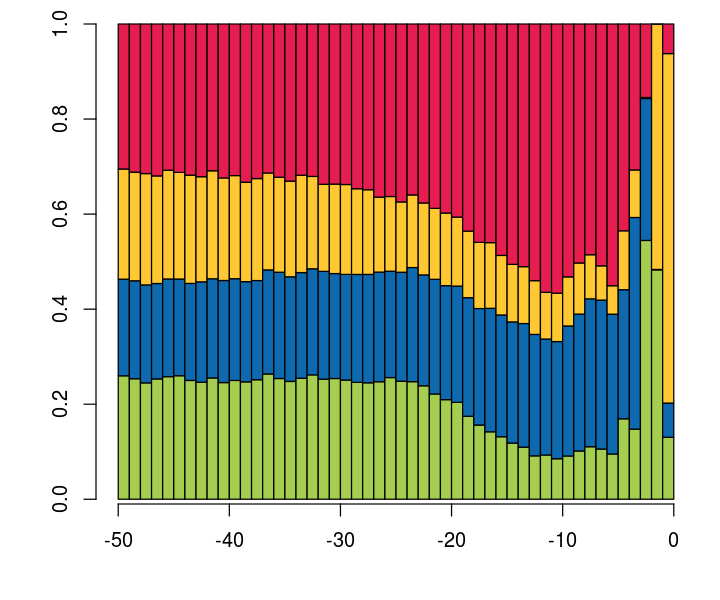

In [149]:
options(repr.plot.width = 6, repr.plot.height = 5)
par(mar = c(4,4,1,1))
barplot(t(as.matrix(seq50)), col = base2col$color, width = 1, space = 0)
axis(1, at = (0:5) * 10, labels = -(5:0) * 10)

# Look at fimo results

In [ ]:
fimo = fread("/frazer01/home/tarthur/projects/CARDIPS/rbp_analysis/affinity_analysis", sep = "\t", header = TRUE, data.table = FALSE)

In [ ]:
file.symlink(from = )

In [136]:
str(intron50)

'data.frame':	50 obs. of  4 variables:
 $ pos      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ n_introns: int  7473 7473 7473 7473 7473 7473 7473 7473 7473 7473 ...
 $ n_vars   : int  10 6 9 6 8 15 12 9 10 15 ...
 $ fr_vars  : num  0.001338 0.000803 0.001204 0.000803 0.001071 ...


# Are eVariants closer to the SS more likely to be pyrimidine (C-T)

In [80]:
intron2fm         = merge(intron_01[,c("tr2var", "transcript_id", "gene_id", "id", "dist", "intron_id", "intron_length")], fm[,c("tr2var", "chrom", "pos", "ref", "alt", "rsid", "beta", "type", "pp")])
intron2fm         = merge(intron2fm, geneinfo[,c("transcript_id", "strand")])
intron2fm$tr2type = paste(intron2fm$transcript_id, intron2fm$type)
intron2fm$bin     = trunc(-intron2fm$dist/50) + 1
intron2fm$pyr     = FALSE

intron2fm[intron2fm$strand == "+" & intron2fm$ref %in% c("C", "T"), "pyr"] = TRUE
intron2fm[intron2fm$strand == "-" & intron2fm$ref %in% c("A", "G"), "pyr"] = TRUE



	Pearson's product-moment correlation

data:  1:nrow(toplot) and toplot$true
t = -0.16246, df = 198, p-value = 0.8711
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1500451  0.1274007
sample estimates:
        cor 
-0.01154442 


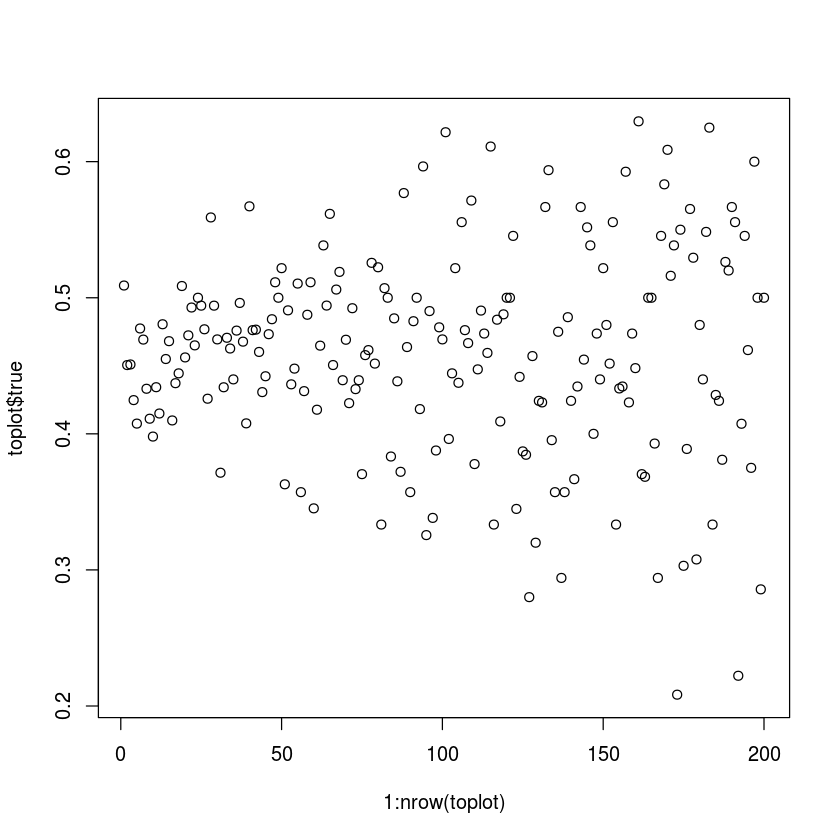

In [87]:
toplot = as.data.frame.matrix(table(intron2fm[,c("bin", "pyr")]))
toplot$n = rowSums(toplot[,c("TRUE", "FALSE")])

toplot$true = toplot[,"TRUE"] / toplot$n

plot(1:nrow(toplot), toplot$true)
cor.test(1:nrow(toplot), toplot$true)


# Are eVariants closer to the SS more likely to be associated with GWAS?

In [54]:
intron2fm         = merge(intron_01[,c("tr2var", "transcript_id", "gene_id", "id", "dist", "intron_id", "intron_length")], fm[,c("tr2var", "chrom", "pos", "ref", "alt", "rsid", "beta", "type", "pp")])
intron2fm$tr2type = paste(intron2fm$transcript_id, intron2fm$type)
coloc    $tr2type = paste(coloc    $transcript_id, coloc    $type)
intron2fm         = merge(intron2fm, aggregate(PP.H4.abf ~ tr2type, data = coloc, FUN = max))
intron2fm$bin     = trunc(-intron2fm$dist/50) + 1


In [55]:
intron2gwas = aggregate(PP.H4.abf ~ bin, data = intron2fm[intron2fm$PP.H4.abf >= 0.5,], FUN = length)
colnames(intron2gwas) = c("bin", "gwas")

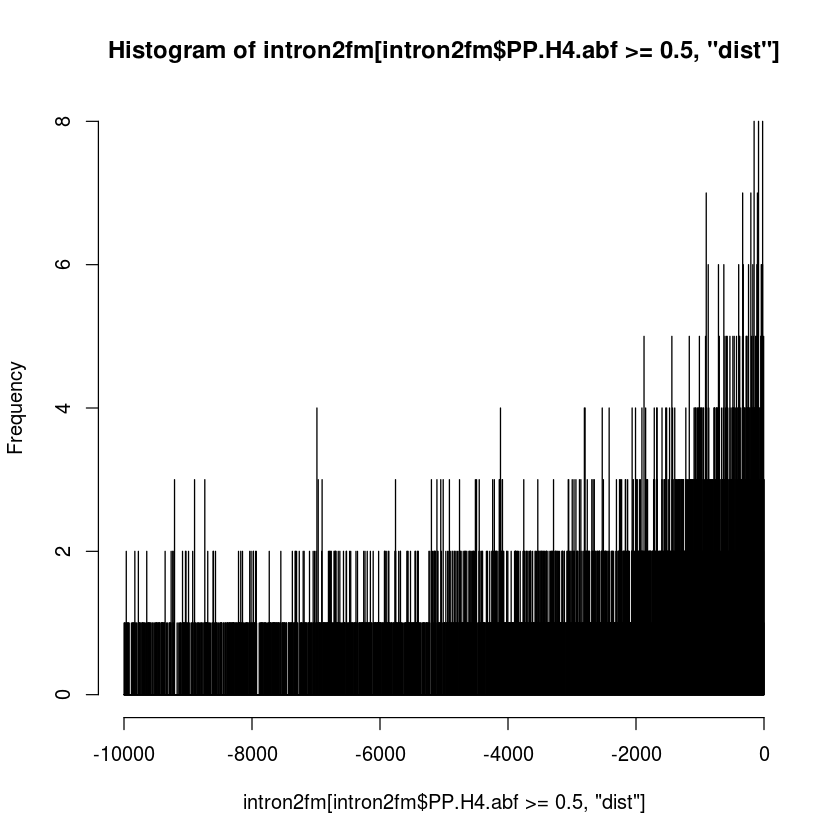

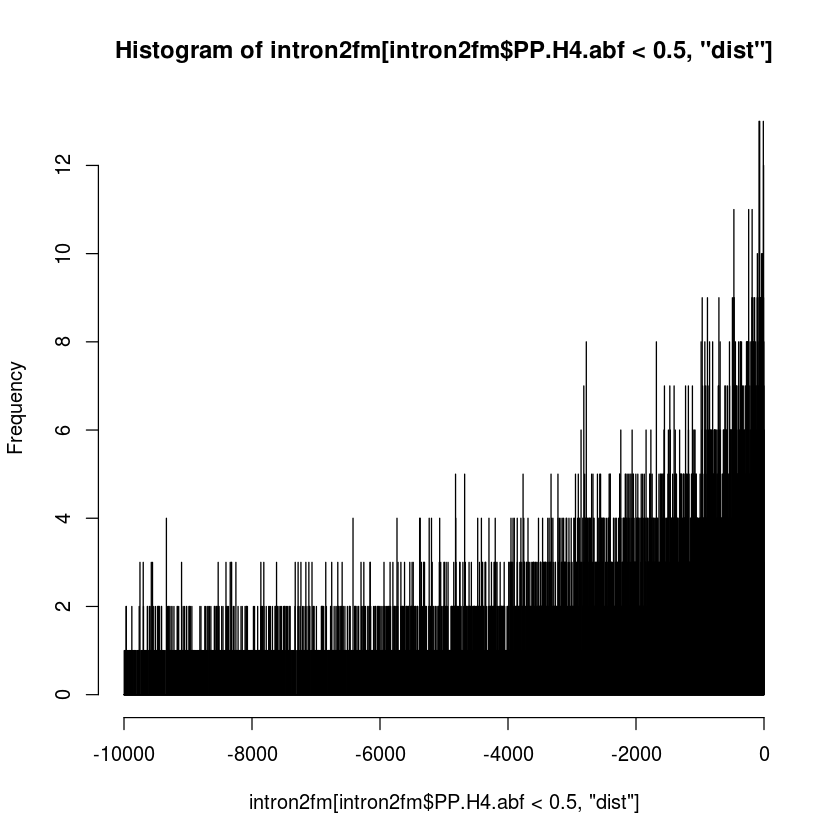

In [56]:
hist(intron2fm[ intron2fm$PP.H4.abf >= 0.5, "dist"], breaks = -10000:0)
hist(intron2fm[ intron2fm$PP.H4.abf <  0.5, "dist"], breaks = -10000:0)


In [57]:
intron2bin = merge(intron2bin_01, intron2gwas, all.x = TRUE)


fisher.test(matrix(c(intron2bin[1, "gwas"],
                     intron2bin[1, "vars"] - intron2bin[1, "gwas"],
                     sum(intron2bin[2:nrow(intron2bin), "gwas"]),
                     sum(intron2bin[2:nrow(intron2bin), "vars"]) - sum(intron2bin[2:nrow(intron2bin), "gwas"])
                    ), nrow = 2, byrow = TRUE))


	Fisher's Exact Test for Count Data

data:  matrix(c(intron2bin[1, "gwas"], intron2bin[1, "vars"] - intron2bin[1, "gwas"], sum(intron2bin[2:nrow(intron2bin), "gwas"]), sum(intron2bin[2:nrow(intron2bin), "vars"]) - sum(intron2bin[2:nrow(intron2bin), "gwas"])), nrow = 2, byrow = TRUE)
p-value = 0.7347
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.7900156 1.1685628
sample estimates:
odds ratio 
 0.9623958 


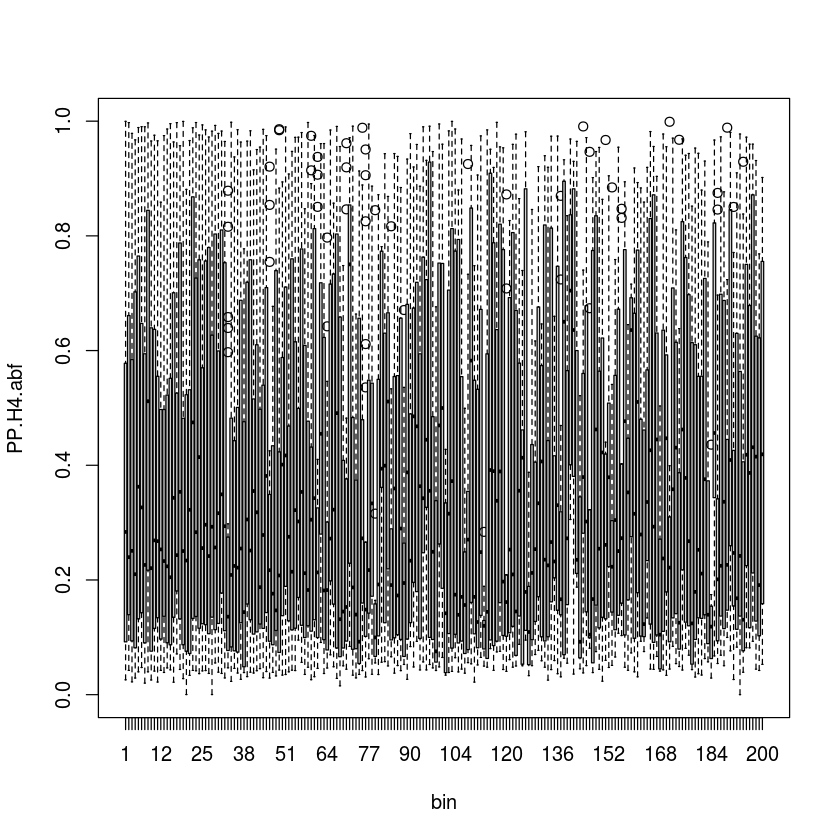

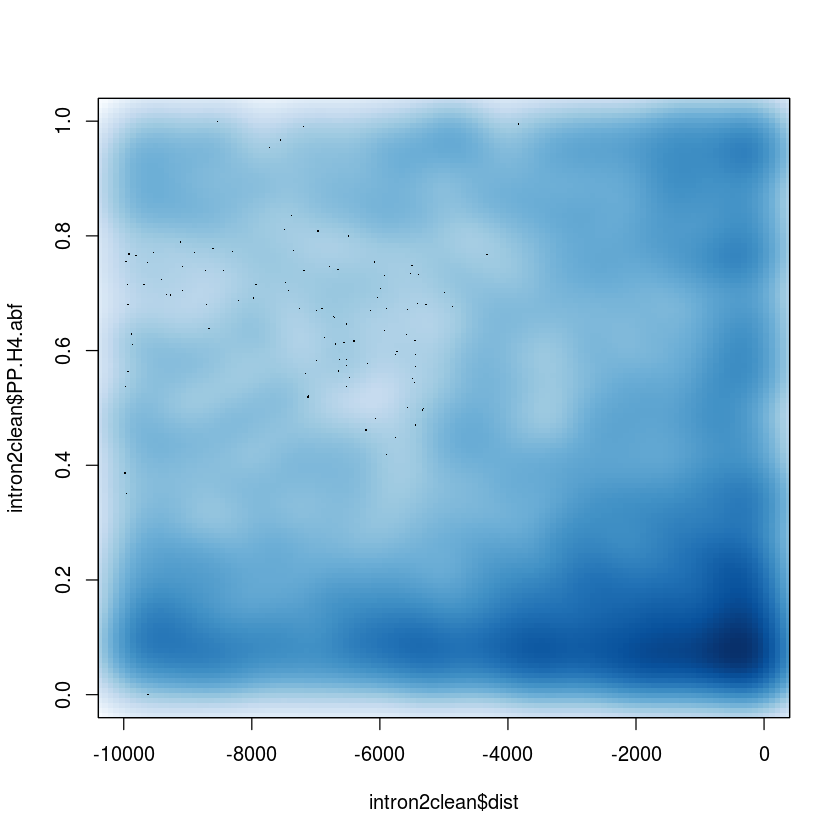

In [73]:
intron2clean = as.data.frame(rbindlist(lapply(sort(unique(intron2fm$tr2type)), function(x)
{
    out = intron2fm[intron2fm$tr2type == x,]
    out = out[which.min(out$dist),]
})), stringsAsFactors = FALSE)


boxplot(PP.H4.abf ~ bin, data = intron2clean)
smoothScatter(intron2clean$dist, intron2clean$PP.H4.abf)



intron2gwas           = aggregate(PP.H4.abf ~ bin, data = intron2clean[intron2clean$PP.H4.abf >= 0.5,], FUN = length)
colnames(intron2gwas) = c("bin", "gwas")

intron2n              = aggregate(dist ~ bin, data = intron2clean, FUN = length)
colnames(intron2n   ) = c("bin", "vars")

intron2gwas = merge(intron2n, intron2gwas, all.x = TRUE)
intron2gwas[is.na(intron2gwas$gwas) == TRUE, "gwas"] = 0

In [66]:
summary(aov(PP.H4.abf ~ bin, data = intron2clean))
summary(aov(PP.H4.abf ~ dist, data = intron2clean))


              Df Sum Sq Mean Sq F value Pr(>F)
bin            1    0.0  0.0082   0.088  0.767
Residuals   3562  333.4  0.0936               

              Df Sum Sq Mean Sq F value Pr(>F)
dist           1    0.0 0.00836   0.089  0.765
Residuals   3562  333.4 0.09360               

In [74]:
fisher.test(matrix(c(intron2gwas[1, "gwas"],
                     intron2gwas[1, "vars"] - intron2gwas[1, "gwas"],
                     sum(intron2gwas[2:nrow(intron2gwas), "gwas"]),
                     sum(intron2gwas[2:nrow(intron2gwas), "vars"]) - sum(intron2gwas[2:nrow(intron2gwas), "gwas"])
                    ), nrow = 2, byrow = TRUE))


	Fisher's Exact Test for Count Data

data:  matrix(c(intron2gwas[1, "gwas"], intron2gwas[1, "vars"] - intron2gwas[1, "gwas"], sum(intron2gwas[2:nrow(intron2gwas), "gwas"]), sum(intron2gwas[2:nrow(intron2gwas), "vars"]) - sum(intron2gwas[2:nrow(intron2gwas), "gwas"])), nrow = 2, byrow = TRUE)
p-value = 0.6664
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.5629183 1.4057011
sample estimates:
odds ratio 
 0.8993008 


In [72]:
str(intron2gwas)

'data.frame':	200 obs. of  3 variables:
 $ bin : num  1 2 3 4 5 6 7 8 9 10 ...
 $ vars: int  101 55 64 54 50 45 37 44 39 52 ...
 $ gwas: int  30 18 24 16 22 16 11 23 13 18 ...


In [59]:
str(intron2clean)

'data.frame':	3564 obs. of  18 variables:
 $ tr2type      : chr  "ENST00000000412.3 0" "ENST00000000412.3 1" "ENST00000002125.9_2 0" "ENST00000003302.8_2 0" ...
 $ tr2var       : chr  "ENST00000000412.3 VAR_12_9099533_T_C" "ENST00000000412.3 VAR_12_9097556_CCATCATGGCCAA_C" "ENST00000002125.9_2 VAR_2_37459670_G_T" "ENST00000003302.8_2 VAR_11_113718934_T_C" ...
 $ transcript_id: chr  "ENST00000000412.3" "ENST00000000412.3" "ENST00000002125.9_2" "ENST00000003302.8_2" ...
 $ gene_id      : chr  "ENSG00000003056.3" "ENSG00000003056.3" "ENSG00000003509.16_5" "ENSG00000048028.11_6" ...
 $ id           : chr  "VAR_12_9099533_T_C" "VAR_12_9097556_CCATCATGGCCAA_C" "VAR_2_37459670_G_T" "VAR_11_113718934_T_C" ...
 $ dist         : int  -532 -1050 -3569 -6444 -7582 -132 -842 -6685 -3983 -1205 ...
 $ intron_id    : chr  "chr12.9099001.9102084" "chr12.9096506.9098014" "chr2.37459409.37463239" "chr11.113712490.113723223" ...
 $ intron_length: int  3083 1508 3830 10733 17316 164 1075 7229 4104 7684 ...

In [53]:
str(intron2fm)

'data.frame':	16551 obs. of  16 variables:
 $ tr2type      : chr  "ENST00000000412.3 0" "ENST00000000412.3 0" "ENST00000000412.3 1" "ENST00000000412.3 1" ...
 $ tr2var       : chr  "ENST00000000412.3 VAR_12_9094548_A_G" "ENST00000000412.3 VAR_12_9099533_T_C" "ENST00000000412.3 VAR_12_9094548_A_G" "ENST00000000412.3 VAR_12_9097556_CCATCATGGCCAA_C" ...
 $ transcript_id: chr  "ENST00000000412.3" "ENST00000000412.3" "ENST00000000412.3" "ENST00000000412.3" ...
 $ gene_id      : chr  "ENSG00000003056.3" "ENSG00000003056.3" "ENSG00000003056.3" "ENSG00000003056.3" ...
 $ id           : chr  "VAR_12_9094548_A_G" "VAR_12_9099533_T_C" "VAR_12_9094548_A_G" "VAR_12_9097556_CCATCATGGCCAA_C" ...
 $ dist         : int  -12 -532 -12 -1050 -88 -332 -728 -33 -532 -3569 ...
 $ chrom        : int  12 12 12 12 12 12 12 12 12 2 ...
 $ pos          : int  9094548 9099533 9094548 9097556 9095226 9095470 9097234 9099034 9099533 37459670 ...
 $ ref          : chr  "A" "T" "A" "CCATCATGGCCAA" ...
 $ alt          

In [26]:
1:200 * 50

[1]    50   100   150   200   250   300   350   400   450   500   550   600
 [13]   650   700   750   800   850   900   950  1000  1050  1100  1150  1200
 [25]  1250  1300  1350  1400  1450  1500  1550  1600  1650  1700  1750  1800
 [37]  1850  1900  1950  2000  2050  2100  2150  2200  2250  2300  2350  2400
 [49]  2450  2500  2550  2600  2650  2700  2750  2800  2850  2900  2950  3000
 [61]  3050  3100  3150  3200  3250  3300  3350  3400  3450  3500  3550  3600
 [73]  3650  3700  3750  3800  3850  3900  3950  4000  4050  4100  4150  4200
 [85]  4250  4300  4350  4400  4450  4500  4550  4600  4650  4700  4750  4800
 [97]  4850  4900  4950  5000  5050  5100  5150  5200  5250  5300  5350  5400
[109]  5450  5500  5550  5600  5650  5700  5750  5800  5850  5900  5950  6000
[121]  6050  6100  6150  6200  6250  6300  6350  6400  6450  6500  6550  6600
[133]  6650  6700  6750  6800  6850  6900  6950  7000  7050  7100  7150  7200
[145]  7250  7300  7350  7400  7450  7500  7550  7600  7650  7700  7750  7800
[157]  7850  7900  7950  8000  8050  8100  8150  8200  8250  8300  8350  8400
[169]  8450  8500  8550  8600  8650  8700  8750  8800  8850  8900  8950  9000
[181]  9050  9100  9150  9200  9250  9300  9350  9400  9450  9500  9550  9600
[193]  9650  9700  9750  9800  9850  9900  9950 10000

In [32]:
a = sample(1:1000, size = 10)

a
a/50

trunc(a/50) + 1


[1]  85 168 386 735  28 844 414 548 872 749

[1]  1.70  3.36  7.72 14.70  0.56 16.88  8.28 10.96 17.44 14.98

[1]  2  4  8 15  1 17  9 11 18 15

In [39]:
str(intron_01)

'data.frame':	16376 obs. of  19 variables:
 $ gene_id            : chr  "ENSG00000000971.16_4" "ENSG00000000971.16_4" "ENSG00000000971.16_4" "ENSG00000000971.16_4" ...
 $ V1                 : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ V2                 : int  196659369 196659369 196683047 196684899 196684899 196684899 196697652 196697652 196697652 196706790 ...
 $ V3                 : int  196682865 196682865 196684723 196694251 196694251 196694251 196705954 196705954 196705954 196709749 ...
 $ V4                 : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ V5                 : int  196677898 196679010 196683274 196687515 196691625 196692148 196698082 196700322 196705520 196708455 ...
 $ V6                 : int  196677899 196679011 196683275 196687516 196691626 196692149 196698083 196700323 196705521 196708456 ...
 $ V7                 : chr  "VAR_1_196677898_A_T" "VAR_1_196679010_A_G" "VAR_1_196683274_A_G" "VAR_1_196687515_G_A" ...
 $ V9                 : chr  "ENST00000367429.9_2" "ENST0

In [47]:
head(sort(table(intron_01$V7), decreasing = TRUE))


VAR_1_100156658_T_C VAR_1_100458417_G_A VAR_1_100463804_A_G VAR_1_100466279_G_A 
                  1                   1                   1                   1 
VAR_1_100471566_T_C VAR_1_100478755_T_C 
                  1                   1 

In [48]:
str(intron2fm)

'data.frame':	16551 obs. of  16 variables:
 $ tr2type      : chr  "ENST00000000412.3 0" "ENST00000000412.3 0" "ENST00000000412.3 1" "ENST00000000412.3 1" ...
 $ tr2var       : chr  "ENST00000000412.3 VAR_12_9094548_A_G" "ENST00000000412.3 VAR_12_9099533_T_C" "ENST00000000412.3 VAR_12_9094548_A_G" "ENST00000000412.3 VAR_12_9097556_CCATCATGGCCAA_C" ...
 $ transcript_id: chr  "ENST00000000412.3" "ENST00000000412.3" "ENST00000000412.3" "ENST00000000412.3" ...
 $ gene_id      : chr  "ENSG00000003056.3" "ENSG00000003056.3" "ENSG00000003056.3" "ENSG00000003056.3" ...
 $ id           : chr  "VAR_12_9094548_A_G" "VAR_12_9099533_T_C" "VAR_12_9094548_A_G" "VAR_12_9097556_CCATCATGGCCAA_C" ...
 $ dist         : int  -12 -532 -12 -1050 -88 -332 -728 -33 -532 -3569 ...
 $ chrom        : int  12 12 12 12 12 12 12 12 12 2 ...
 $ pos          : int  9094548 9099533 9094548 9097556 9095226 9095470 9097234 9099034 9099533 37459670 ...
 $ ref          : chr  "A" "T" "A" "CCATCATGGCCAA" ...
 $ alt          